In [4]:
cd ~/Nap

/scr/drew/Serotonin/ligands/25N-N1-Nap/6WHA/noGProtein/IFD_1/tryIonicCapsInSolvent/6WGTECLTemplate


In [29]:
import glob
import numpy as np

frames_per_cluster_trajectory = []

files = glob.glob(".cluster*")

clusters = {}

class Clust:
    def __init__(self, file):
        self._file = file
        _, cluster, trajectory, _, count, min_rmsd_frame_idx, _ = file.split('.')
        _, cluster = cluster.split("cluster")
        _, trajectory = trajectory.split("traj")
        _, count = count.split("count")
        _, min_rmsd_frame_idx = min_rmsd_frame_idx.split("on")
        self._id = int(cluster)
        self._trajectory_id = int(trajectory)
        self._frame_count = int(count)
        self._min_rmsd_frame_idx = int(min_rmsd_frame_idx)

    id = property(lambda self: self._id)
    file = property(lambda self: self.file)
    trajectory_id = property(lambda self: self._trajectory_id)
    frame_count = property(lambda self: self._frame_count)
    
    @classmethod
    def zeroWithId(_, id):
        return Clust(f'.cluster{id}.traj0.frames0-0.count0.on0.mae')
    
    def __lt__(self, other):
        return self._frame_count < other.frame_count

    def __eq__(self, other):
        return self._frame_count == other.frame_count

    
min_rmsd_clusts = {}

for file in files:
    clust = Clust(file)
    current_min_clust = min_rmsd_clusts.get(clust.id, Clust.zeroWithId(clust.id))
    min_rmsd_clusts[clust.id] = min(current_min_clust, clust)
    frames_per_cluster_trajectory.append([clust.id, clust.trajectory_id, clust.frame_count])
frames_per_cluster_trajectory_arr = np.array(frames_per_cluster_trajectory)
cluster_max = np.max(frames_per_cluster_trajectory_arr[:,0])
trajectory_max = np.max(frames_per_cluster_trajectory_arr[:,1])
data = np.zeros((cluster_max + 1, trajectory_max + 1), dtype="int")

for datum in frames_per_cluster_trajectory_arr:
    #print(datum[0], datum[1], datum[2])
    data[datum[0],datum[1]] += datum[2]


In [21]:
np.sum(data, axis=0)

array([251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251])

[Text(0.5, 23.52222222222222, 'trajectory'),
 Text(50.722222222222214, 0.5, 'cluster')]

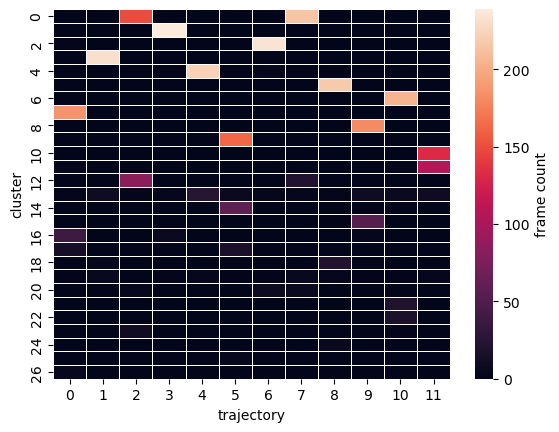

In [8]:
import seaborn as sb
ax = sb.heatmap(data, robust=False, linewidths = 0.5, cbar_kws = {"label": "frame count"})
ax.set(xlabel="trajectory", ylabel="cluster")

In [30]:
min_rmsd_clusts

{19: <__main__.Clust at 0x7f3742af2190>,
 4: <__main__.Clust at 0x7f3742af20a0>,
 13: <__main__.Clust at 0x7f3742af2430>,
 11: <__main__.Clust at 0x7f375c044280>,
 26: <__main__.Clust at 0x7f3742aceee0>,
 21: <__main__.Clust at 0x7f3742acef40>,
 0: <__main__.Clust at 0x7f3742acedf0>,
 10: <__main__.Clust at 0x7f375c04e0d0>,
 1: <__main__.Clust at 0x7f3742b08a30>,
 18: <__main__.Clust at 0x7f3742b089d0>,
 22: <__main__.Clust at 0x7f3742b08bb0>,
 7: <__main__.Clust at 0x7f3742b08a00>,
 20: <__main__.Clust at 0x7f3742b08ca0>,
 16: <__main__.Clust at 0x7f3742bd6910>,
 12: <__main__.Clust at 0x7f3742ad0250>,
 14: <__main__.Clust at 0x7f3742ad0af0>,
 5: <__main__.Clust at 0x7f3742bd6b80>,
 25: <__main__.Clust at 0x7f3742ad0550>,
 6: <__main__.Clust at 0x7f3742ad0760>,
 3: <__main__.Clust at 0x7f3742ad0d00>,
 23: <__main__.Clust at 0x7f3742bcc2e0>,
 15: <__main__.Clust at 0x7f3742aee520>,
 17: <__main__.Clust at 0x7f3742aee7c0>,
 2: <__main__.Clust at 0x7f3742aee760>,
 8: <__main__.Clust at 0

In [2]:
from openbabel import pybel

In [11]:
data

array([[  0,   0, 150,   0,   0,   0,   0, 214,   0,   0,   0,   0],
       [  0,   0,   0, 239,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0, 234,   0,   0,   0,   0,   0],
       [  0, 232,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   1,   1, 223,   1,   4,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 218,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 205,   0],
       [186,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 182,   0,   0],
       [  0,   0,   0,   0,   0, 163,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 131],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 107],
       [  0,   0,  83,   0,   0,   0,   0,  21,   0,   0,   0,   0],
       [  2,   9,   2,   3,  25,   7,   3,   3,   2,   9,   6,  10],
       [  0,   0,   0,   0,   0,  